### Mendefiniskan Data Dummy

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)
X = np.absolute(X)
X = np.round(X, 2) * 100
X = X.astype(int)
print(X)
print(y)

[[ 79 160]
 [182  81]
 [ 88 173]
 [106 130]
 [130 308]
 [168  67]
 [291  52]
 [141 129]
 [ 19 141]
 [ 24 238]
 [ 92  10]
 [108 199]
 [159 101]
 [154  80]
 [262  11]
 [252 109]
 [173  26]
 [193 154]
 [179 154]
 [ 63 157]
 [ 71  75]
 [ 53  52]
 [ 49  76]
 [183  89]
 [ 84  89]
 [112  89]
 [183  69]
 [ 40 159]
 [  1 138]
 [ 80 147]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


### (Opsional) Membuat Data Frame

In [2]:
import pandas as pd

y_new = y.reshape(len(y), 1)
data = np.concatenate((X, y_new), axis=1)
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']
df = pd.DataFrame(data, columns=nama_kolom)
df.head()

,Fitur 1,Fitur 2,Label
0,79,160,0
1,182,81,0
2,88,173,0
3,106,130,0
4,130,308,0


In [3]:
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

df_label = df.copy()
df_label['Label'] = df_label['Label'].map(labels)
df_label.head()

,Fitur 1,Fitur 2,Label
0,79,160,Kelas B
1,182,81,Kelas B
2,88,173,Kelas B
3,106,130,Kelas B
4,130,308,Kelas B


### (Opsional) Visualisasi Data

C:\Users\User\AppData\Local\Temp\ipykernel_7384\2700686111.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
C:\Users\User\AppData\Local\Temp\ipykernel_7384\2700686111.py:10: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


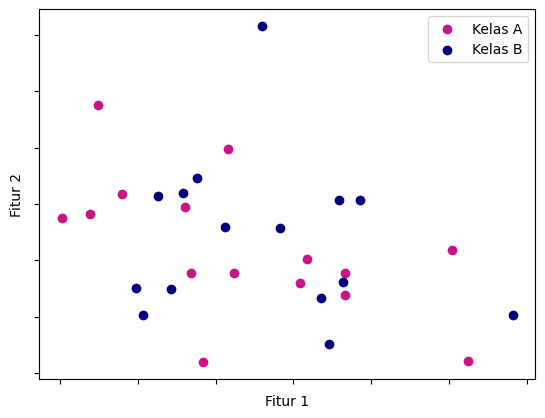

In [4]:
import matplotlib.pyplot as plt

colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### Klasifikasi Multinomial Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

mnb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)
mnb.fit(X_train, y_train)
y_train_pred = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6666666666666666
Hasil akurasi data test: 0.3333333333333333


### Klasifikasi Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

y_test_pred_gnb = gnb.predict(X_test)
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7142857142857143
Hasil akurasi data test (Gaussian): 0.4444444444444444
